<a href="https://colab.research.google.com/github/federico2018lc/InnovacionDatosProyectoFinal/blob/main/analisis_datos_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción, preparación y transformación de datos.
Etapa preparacion y extraccion: Para comenzar el analisis, importamos las librerias a utilizar y cargamos los archivos csv para luego realizar etl



In [ ]:
import pandas as pd

Lectura del los archivos 'customer_data.csv' y 'sales_data'

Para trabajar con los archivo.csv tendremos que importar la libreria Pandas y aplicar el método pd.read_csv("nombre.csv") a un archivo ya cargado al colab(margen izquierdo)

Esto creara un dataframe, una estructura de datos similar a una tabla con varias columnas.

In [177]:
clientes=pd.read_csv( 'customer_data.csv')
ventas= pd.read_csv('sales_data.csv')
print(f"Dimensiones de clientes:{clientes.shape} ")
print(f"Dimensiones de ventas:{ventas.shape} ")

Dimensiones de clientes:(99457, 4) 
Dimensiones de ventas:(99457, 7) 


Presentamos el encabezado con algunos datos de cada tabla.

Columnas Clientes: `customer_id; gender; age; payment_method`

Columnas Ventas: `invoice_no customer_id  category  quantity    price invoice_date shopping_mall`

Reconemos la columna en común `customer_id `


In [178]:
print("Tabla Clientes")
print(clientes.head())
print("Tabla Ventas")
print(ventas.head())

Tabla Clientes
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash
Tabla Ventas
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


Verificamos si las columnas customer_id tienen los mismo datos.

In [179]:
set(clientes['customer_id']) == set(ventas['customer_id'])
#las columnas contienen los mismo datos

True

In [180]:
clientes['customer_id'].value_counts()
#Por cada id un cliente.

,count
customer_id,
C273973,1
C137631,1
C776199,1
C363191,1
C180055,1
...,...
C657758,1
C189076,1
C988172,1


In [181]:
ventas['customer_id'].value_counts().sort_values(ascending=False)
#Total de 99457 clientes hicieron 1 compra cada uno.

,count
customer_id,
C111565,1
C235554,1
C131810,1
C223470,1
C119287,1
...,...
C265057,1
C180055,1
C363191,1


Procedemos a ver el .info de los df clientes y ventas

In [182]:
print(clientes.info())
print(ventas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB

con las sentencias anteriores, pudimos observar que tipo de datos contiene cada data set ( objects: innvoice no, customerid, gender, payment method, category, invoice date, shopping mall), float (age, price) e int (quantity). Observamos que tienen en comun la columna customer_id y que las primeras columnas pueden ser eliminadas(contienen un indice) ya que usaremos la columna id

Etapa: transformación y limpieza de datos

# Transformación - Agrupación de clientes y ventas - Método Merge

Dado que tienen los mismo datos en la columna customer_id, procedemos con unir los dataframe con el método pd.merge con el how='inner' que agrupa los datos de ambas tablas.

In [183]:
df= pd.merge(ventas, clientes, on='customer_id', how='inner')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   category        99457 non-null  object 
 3   quantity        99457 non-null  int64  
 4   price           99457 non-null  float64
 5   invoice_date    99457 non-null  object 
 6   shopping_mall   99457 non-null  object 
 7   gender          99457 non-null  object 
 8   age             99338 non-null  float64
 9   payment_method  99457 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 7.6+ MB


# Busqueda datos faltantes

In [185]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,119
payment_method,0


In [186]:
df.dropna (subset=['age'], inplace=True) #elimino los 119 registros vacios, ya que esa cantidad no afecta la muestra de 99338 valores


In [187]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
price,0
invoice_date,0
shopping_mall,0
gender,0
age,0
payment_method,0


Cambio de tipo


In [188]:
df['age'] = df['age'].astype(int)  # convierto a enteros la edad
print(f"age type: {df['age'].dtype}")

age type: int64


Busqueda de duplicados

`np.int64(0)` indica que no hay datos duplicados

In [189]:
df.duplicated().sum()

np.int64(0)

# Estudio por Columnas:
Las columnas que no analizaremos: `'invoice_no', 'customer_id', 'invoice_date'`

Columnas con datos numéricos: `'quantity', 'price','age',`

Columnas con datos categoricos: `'category', 'invoice_date', 'shopping_mall', 'gender', 'payment_method'`

# Estadística básica sobre Datos Numéricos. Método `.describe()`


In [190]:
df.describe().round(2)

,quantity,price,age
count,99338.00,99338.00,99338.00
mean,3.00,689.30,43.43
std,1.41,941.37,14.99
min,1.00,5.23,18.00
25%,2.00,45.45,30.00
50%,3.00,203.30,43.00
75%,4.00,1200.32,56.00
max,5.00,5250.00,69.00


# Conteo datos categoricos: ( Object )

In [191]:
columnus = ['category', 'shopping_mall', 'gender', 'payment_method']

for col in columnus:
    print(f"Columna: {col}")
    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100
    resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
    print(resultado)
    print('------------------')

Columna: category
                 Cantidad  Porcentaje (%)
category                                 
Clothing            34445           34.67
Cosmetics           15084           15.18
Food & Beverage     14761           14.86
Toys                10071           10.14
Shoes               10015           10.08
Technology           4995            5.03
Souvenir             4991            5.02
Books                4976            5.01
------------------
Columna: shopping_mall
                   Cantidad  Porcentaje (%)
shopping_mall                              
Mall of Istanbul      19914           20.05
Kanyon                19805           19.94
Metrocity             14996           15.10
Metropol AVM          10146           10.21
Istinye Park           9765            9.83
Zorlu Center           5065            5.10
Cevahir AVM            4989            5.02
Forum Istanbul         4943            4.98
Viaport Outlet         4910            4.94
Emaar Square Mall      4805         

#Gráficos

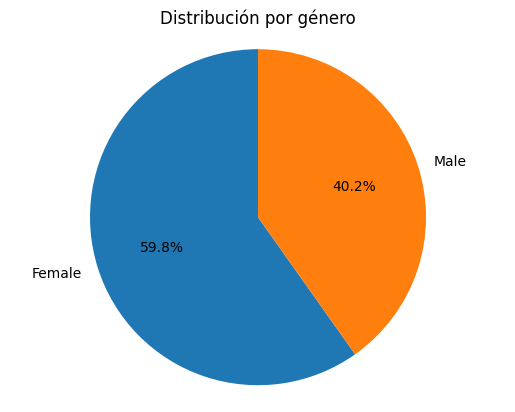

In [192]:
import matplotlib.pyplot as plt

# Contar los valores de la columna
valores = df['gender'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado
plt.show()

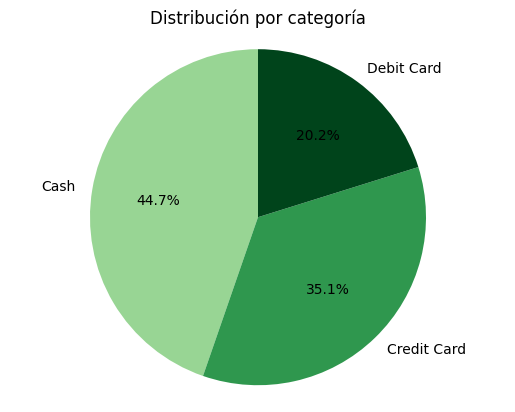

In [193]:
import numpy as np

# Contar los valores de la columna
valores = df['payment_method'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

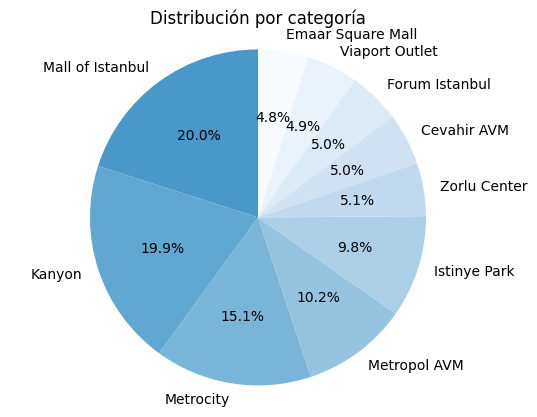

In [194]:
import numpy as np

# Contar los valores de la columna
valores = df['shopping_mall'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Blues_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

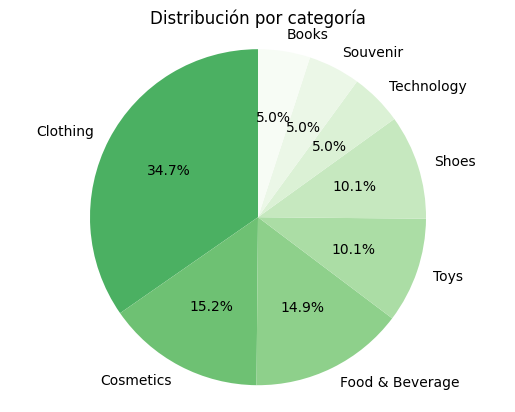

In [195]:
import numpy as np

# Contar los valores de la columna
valores = df['category'].value_counts()
# Paleta continua desde azul a verde
paleta = plt.cm.Greens_r(np.linspace(0.4, 1, len(valores)))

plt.pie(
    valores,
    labels=valores.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=paleta
)
plt.title('Distribución por categoría')
plt.axis('equal')
plt.show()

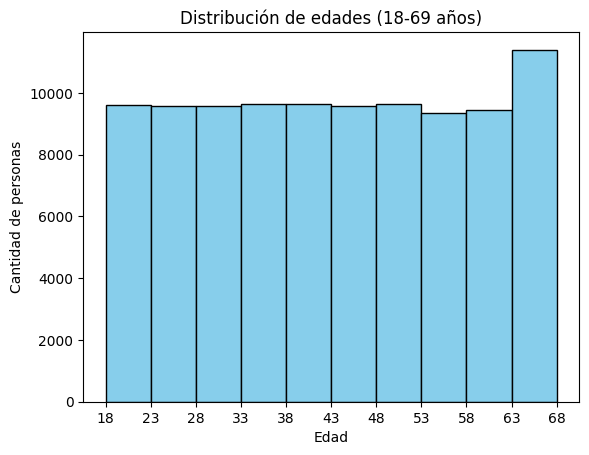

In [196]:


plt.hist(df['age'].dropna(), bins=range(18, 69, 5), color='skyblue', edgecolor='black')
plt.title('Distribución de edades (18-69 años)')
plt.xlabel('Edad')
plt.ylabel('Cantidad de personas')
plt.xticks(range(18, 69, 5))
plt.show()

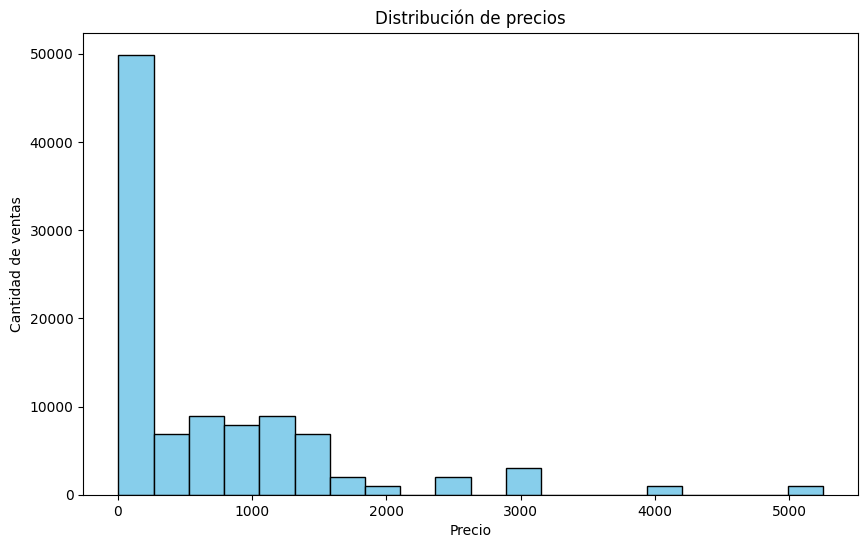

In [197]:
plt.figure(figsize=(10,6))
plt.hist(df['price'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Cantidad de ventas')
plt.show()

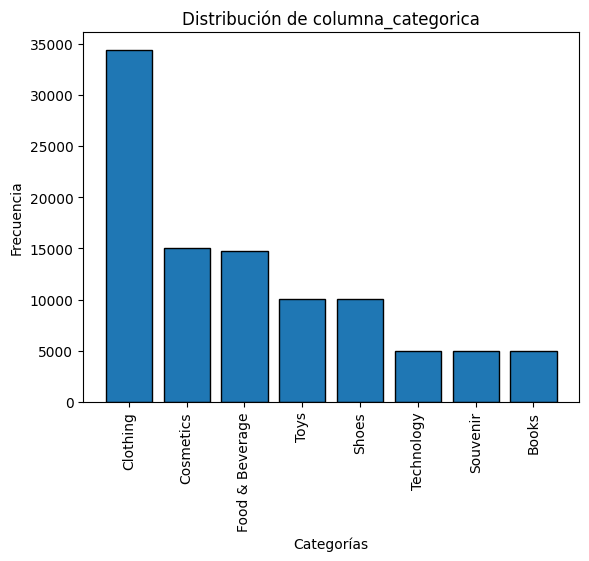

In [198]:
# Contar cuántas veces aparece cada categoría
valores = df['category'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

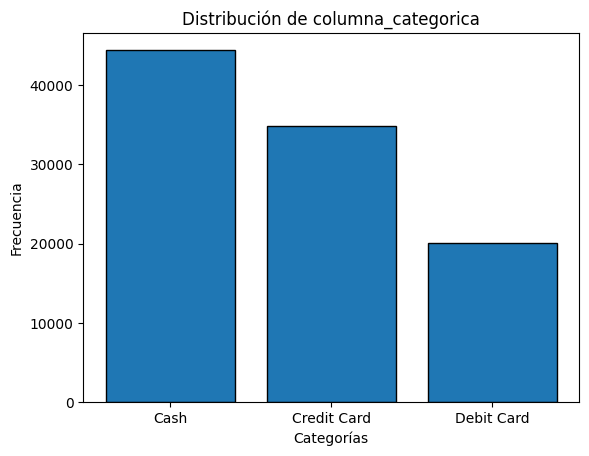

In [199]:
# Contar cuántas veces aparece cada categoría
valores = df['payment_method'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')

plt.show()

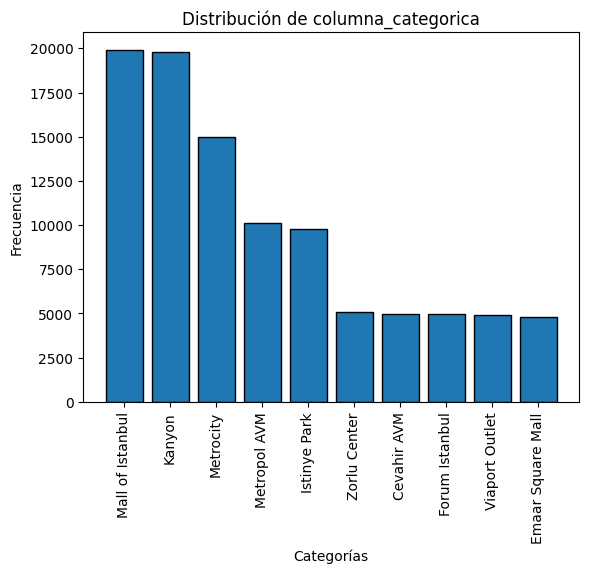

In [200]:
# Contar cuántas veces aparece cada categoría
valores = df['shopping_mall'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de columna_categorica')
plt.xlabel('Categorías')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.ylabel('Frecuencia')

plt.show()

# Gráficos conjuntos

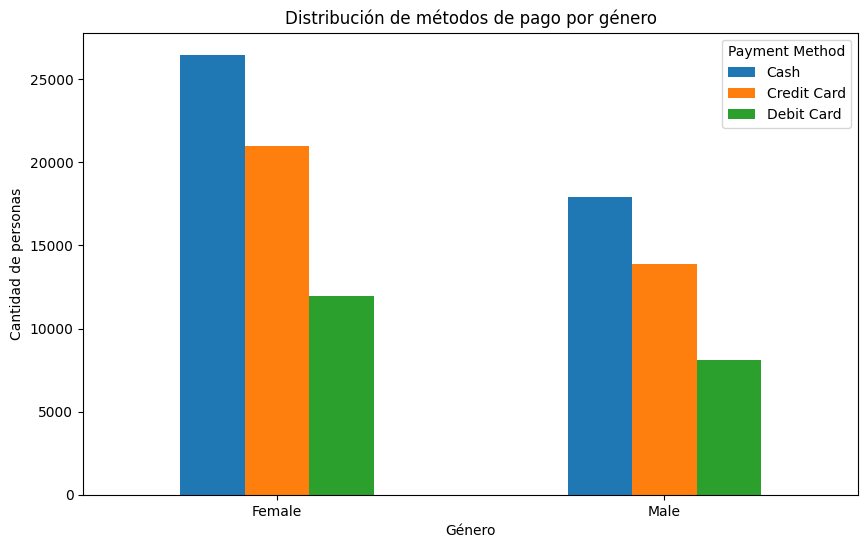

In [202]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

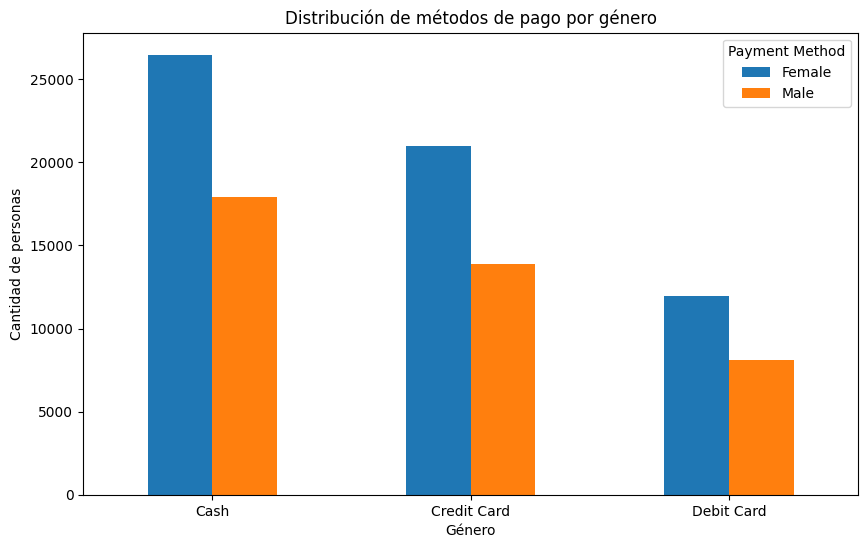

In [203]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['gender'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

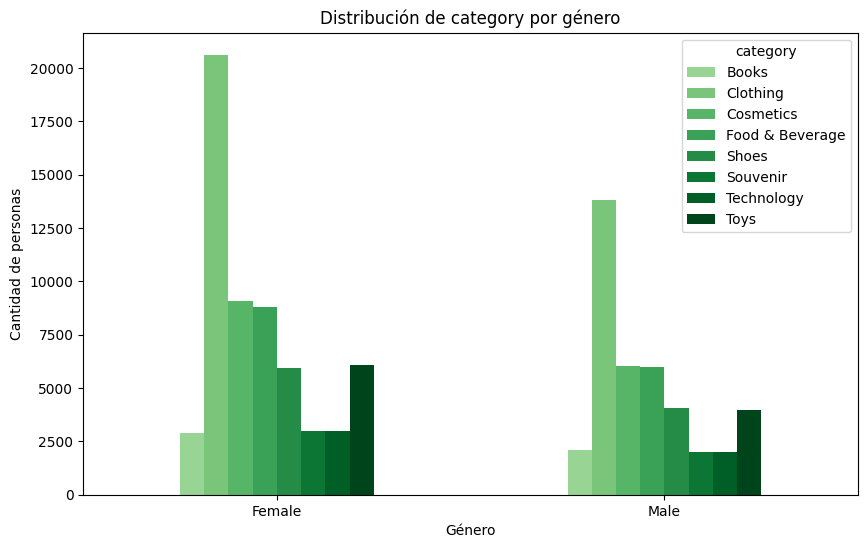

In [204]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.Greens(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

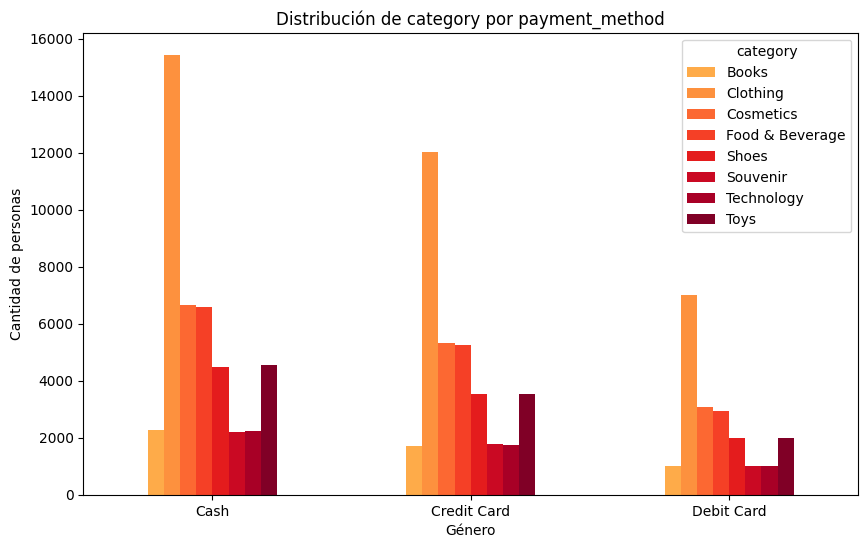

In [205]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['payment_method'], df['category'])

# Gráfico de barras agrupadas
paleta = plt.cm.YlOrRd(np.linspace(0.4, 1, len(tabla.columns)))
tabla.plot(kind='bar', figsize=(10,6), color=paleta)
plt.title('Distribución de category por payment_method')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='category')

plt.show()

<Axes: xlabel='payment_method', ylabel='gender'>

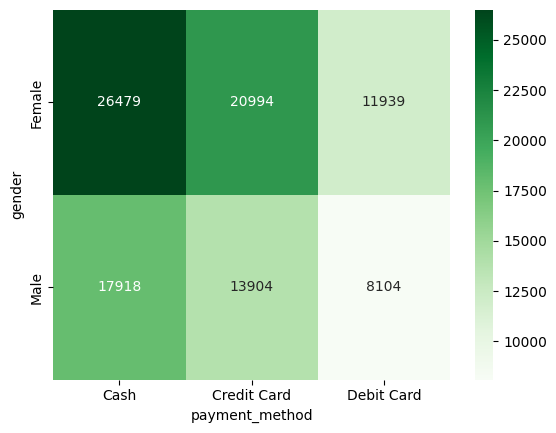

In [206]:
import seaborn as sns

# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

<Axes: xlabel='category', ylabel='gender'>

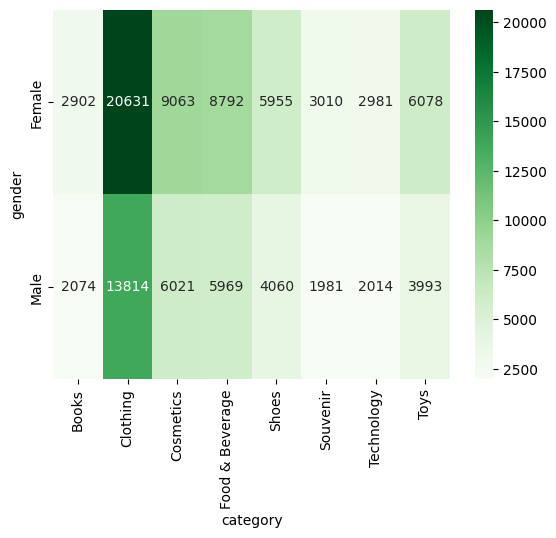

In [207]:
tabla = pd.crosstab(df['gender'], df['category'])
sns.heatmap(tabla, annot=True, fmt='d', cmap='Greens')

# Analisis de datos

In [ ]:
#ventas = ventas[ventas.index.isin(clientes.index)] # Filtro por ventas válidas (coherentes con los clientes existentes)

In [ ]:
#set(ventas.index).issubset(set(clientes.index))

True

In [ ]:
#ventas.loc[:,'invoice_date']= pd.to_datetime(ventas['invoice_date'], format='%d-%m-%Y') #estandarizo fechas. Uso loc para asegurar que se modifique toda la columna del df original

In [ ]:
#(clientes.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)

gender  payment_method
Female  Cash              44.57
        Credit Card       35.34
        Debit Card        20.10
Male    Cash              44.88
        Credit Card       34.82
        Debit Card        20.30
Name: proportion, dtype: float64

In [ ]:
#ventas['invoice_date'].min(), ventas['invoice_date'].max() # aca vemos rango de fechas de la muestra

(Timestamp('2021-01-01 00:00:00'), Timestamp('2023-03-08 00:00:00'))

# Respuestas

1 Metodo de pago mas usado:  en est caso, se observa que es el Cash ( efectivo)

In [208]:
df['payment_method'].value_counts()

,count
payment_method,
Cash,44397
Credit Card,34898
Debit Card,20043


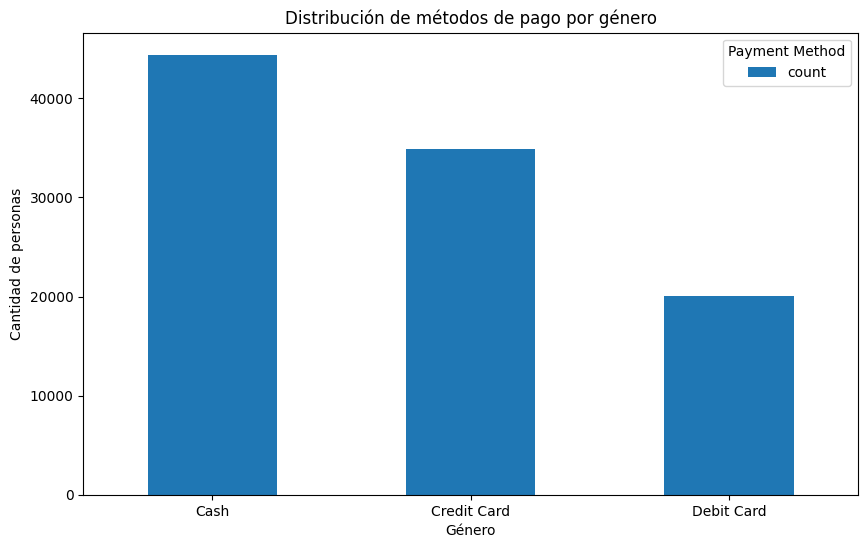

In [209]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = df['payment_method'].value_counts()

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

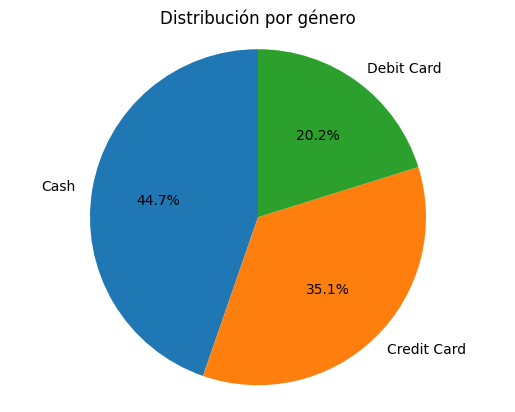

In [210]:
valores = df['payment_method'].value_counts()

# Crear el gráfico circular
plt.pie(valores, labels=valores.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución por género')
plt.axis('equal')  # Hace que el círculo no se vea ovalado
plt.show()

2 Método de pago por genero: aqui se observa que tanto hombres como mujeres utilizan en similares porcentajes los medios de pago, siendo el mas usado el cash( 44,57% mujeres - 44.88% hombres), luego credito (35.34% mujeres - 34.82% hombres) y finalmente debito ( 20.1% mujeres - 20.3% hombres)

In [211]:
porcentaje = (df.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = df.groupby('gender')['payment_method'].value_counts()
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

                       Cantidad  Porcentaje (%)
gender payment_method                          
Female Cash               26479           44.57
       Credit Card        20994           35.34
       Debit Card         11939           20.10
Male   Cash               17918           44.88
       Credit Card        13904           34.82
       Debit Card          8104           20.30


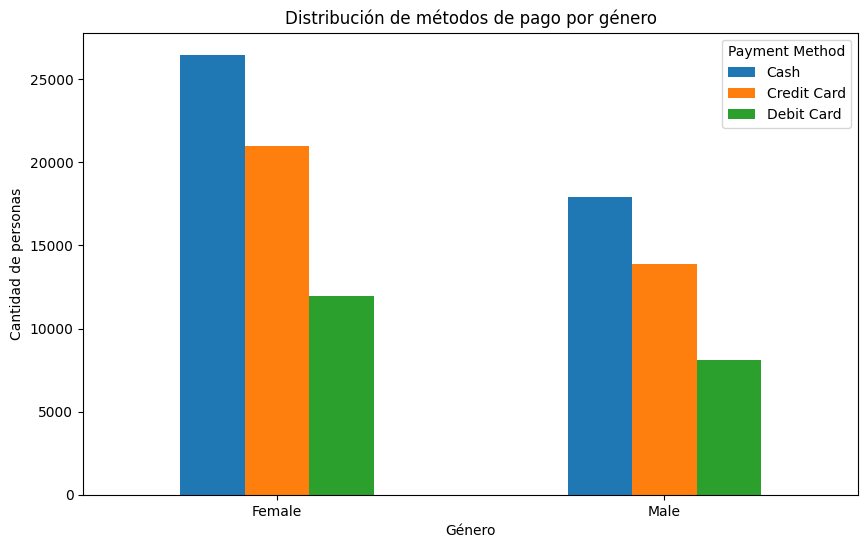

In [212]:
# Tabla cruzada: filas = gender, columnas = payment_method
tabla = pd.crosstab(df['gender'], df['payment_method'])

# Gráfico de barras agrupadas
tabla.plot(kind='bar', figsize=(10,6))
plt.title('Distribución de métodos de pago por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de personas')
plt.xticks(rotation=0)
plt.legend(title='Payment Method')
plt.show()

3 categorización de clientes de acuerdo a su forma de pago (por
edad y género).

In [149]:
(df.groupby('gender')['payment_method'].value_counts(normalize=True)*100).round(2)


gender  payment_method
Female  Cash              44.57
        Credit Card       35.34
        Debit Card        20.10
Male    Cash              44.88
        Credit Card       34.82
        Debit Card        20.30
Name: proportion, dtype: float64

4 Métodos de pagos realizados por el rango etario de 25 a 35 años

In [165]:
print("Métodos de pagos realizados por el rango etario de 25 a 35 años")
df_25_35= df[ (df['age']>=25)& (df['age'] <=35)]
porcentaje = (df_25_35 ['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = df_25_35 ['payment_method'].value_counts()
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

Métodos de pagos realizados por el rango etario de 25 a 35 años
                Cantidad  Porcentaje (%)
payment_method                          
Cash                9356           44.78
Credit Card         7274           34.82
Debit Card          4263           20.40


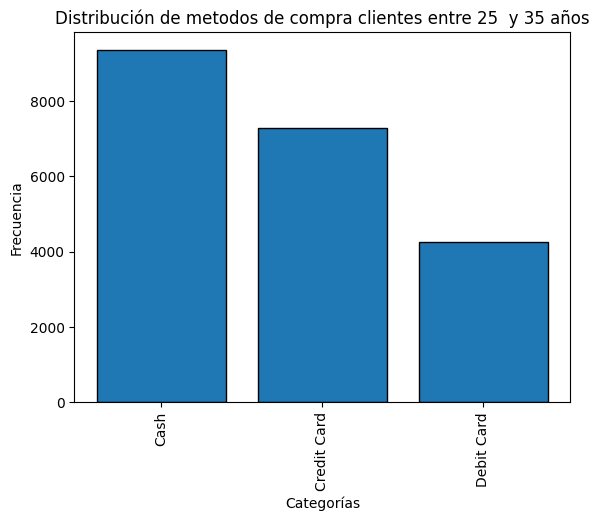

In [172]:
# Contar cuántas veces aparece cada categoría
df_25_35= df[ (df['age']>=25)& (df['age'] <=35)]
valores = df_25_35 ['payment_method'].value_counts()

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Distribución de metodos de compra clientes entre 25  y 35 años')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

##### 5- Métodos de pago más utilizados por las mujeres. Se observa que el 44.57% utiliza cash

In [167]:
print("Métodos de pagos realizados por mujeres")
porcentaje = (df[df['gender']=='Female']['payment_method'].value_counts(normalize=True)*100).round(2)
conteo = (df[df['gender']=='Female']['payment_method'].value_counts()).round(2)
resultado = pd.DataFrame({'Cantidad': conteo, 'Porcentaje (%)': porcentaje.round(2)})
print(resultado)

Métodos de pagos realizados por mujeres
                Cantidad  Porcentaje (%)
payment_method                          
Cash               26479           44.57
Credit Card        20994           35.34
Debit Card         11939           20.10


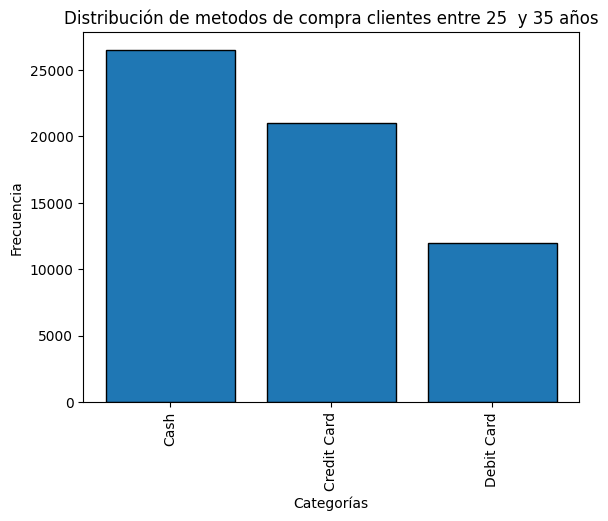

In [173]:
# Contar cuántas veces aparece cada categoría
valores = (df[df['gender']=='Female']['payment_method'].value_counts()).round(2)

# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Métodos de pago más utilizados por las mujeres')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

6- Precios por categoría de productos: aqui vemos el listado de categorias de prodcutos y sus precios promedio

In [168]:
(df.groupby('category')['price'].mean()).round(2)

,price
category,
Books,45.56
Clothing,901.12
Cosmetics,122.45
Food & Beverage,15.67
Shoes,1807.28
Souvenir,34.88
Technology,3157.15
Toys,107.75


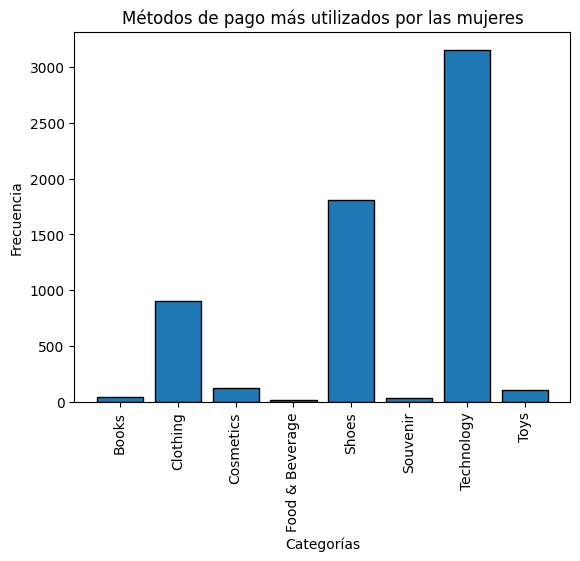

In [176]:
valores= (df.groupby('category')['price'].mean()).round(2)
# Crear el gráfico de barras
plt.bar(valores.index, valores.values, edgecolor='black')
plt.title('Métodos de pago más utilizados por las mujeres')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)  # gira etiquetas si son largas
plt.show()

# ETAPA LOAD - datos limpios. Guardamos datos finales para hacer el analisis

In [121]:
df.to_csv('df_final.csv', index=True)